In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [170]:
fpt_df = pd.read_csv('/content/drive/MyDrive/intern/AI/FPT.csv')
msn_df = pd.read_csv('/content/drive/MyDrive/intern/AI/MSN.csv')
pnj_df = pd.read_csv('/content/drive/MyDrive/intern/AI/PNJ.csv')
vic_df = pd.read_csv('/content/drive/MyDrive/intern/AI/VIC.csv')

In [171]:
def show_trouble(data):
  missing_value = data.isnull().sum()
  duplicated_value = data.duplicated().sum()
  return missing_value, duplicated_value
def get_info(data):
  in4 = data.info()
  describe = data.describe()
  return in4, describe

In [172]:
def convert_to_datetime(df, column_name):
    df[column_name] = pd.to_datetime(df[column_name])
    return df
fpt_df = convert_to_datetime(fpt_df, 'Date/Time')
msn_df = convert_to_datetime(msn_df, 'Date/Time')
pnj_df = convert_to_datetime(pnj_df, 'Date/Time')
vic_df = convert_to_datetime(vic_df, 'Date/Time')

In [173]:
fpt_df

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,2018-12-25 09:15:00,30.89,30.89,30.89,30.89,35410,0
1,FPT,2018-12-25 09:16:00,30.81,30.81,30.81,30.81,190,0
2,FPT,2018-12-25 09:17:00,30.74,30.81,30.74,30.74,1120,0
3,FPT,2018-12-25 09:18:00,30.74,30.74,30.74,30.74,2120,0
4,FPT,2018-12-25 09:19:00,30.74,30.74,30.74,30.74,22500,0
...,...,...,...,...,...,...,...,...
97401,FPT,2020-12-22 14:24:00,58.20,58.20,58.20,58.20,27470,0
97402,FPT,2020-12-22 14:25:00,58.20,58.20,58.20,58.20,14820,0
97403,FPT,2020-12-22 14:26:00,58.20,58.20,58.20,58.20,500,0
97404,FPT,2020-12-22 14:29:00,58.10,58.10,58.10,58.10,2500,0


In [174]:
fpt_in4, fpt_describe = get_info(fpt_df)
print(fpt_in4)
print(fpt_describe)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97406 entries, 0 to 97405
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Ticker         97406 non-null  object        
 1   Date/Time      97406 non-null  datetime64[ns]
 2   Open           97406 non-null  float64       
 3   High           97406 non-null  float64       
 4   Low            97406 non-null  float64       
 5   Close          97406 non-null  float64       
 6   Volume         97406 non-null  int64         
 7   Open Interest  97406 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 5.9+ MB
None
                           Date/Time          Open          High  \
count                          97406  97406.000000  97406.000000   
mean   2020-01-21 05:08:51.739112192     45.071630     45.090138   
min              2018-12-25 09:15:00     30.250000     30.250000   
25%              2019-08

In [175]:
missing_value, duplicated_value = show_trouble(fpt_df)
print(f'missing_value:\n {missing_value}\n')
print(f'duplicated_value: {duplicated_value}\n')

missing_value:
 Ticker           0
Date/Time        0
Open             0
High             0
Low              0
Close            0
Volume           0
Open Interest    0
dtype: int64

duplicated_value: 0



In [176]:
msn_df.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,MSN,2017-12-25 09:15:00,73.1,73.1,73.1,73.1,4210,0
1,MSN,2017-12-25 09:16:00,73.0,73.0,73.0,73.0,5000,0
2,MSN,2017-12-25 09:18:00,73.5,73.5,73.5,73.5,210,0
3,MSN,2017-12-25 09:20:00,73.2,73.5,73.1,73.1,2050,0
4,MSN,2017-12-25 09:21:00,73.0,73.0,73.0,73.0,1380,0


In [177]:
msn_in4, msn_describe = get_info(msn_df)
print(msn_in4)
print(msn_describe)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135354 entries, 0 to 135353
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Ticker         135354 non-null  object        
 1   Date/Time      135354 non-null  datetime64[ns]
 2   Open           135354 non-null  float64       
 3   High           135354 non-null  float64       
 4   Low            135354 non-null  float64       
 5   Close          135354 non-null  float64       
 6   Volume         135354 non-null  int64         
 7   Open Interest  135354 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 8.3+ MB
None
                           Date/Time           Open           High  \
count                         135354  135354.000000  135354.000000   
mean   2019-07-30 01:41:35.644310528      74.878809      74.931668   
min              2017-12-25 09:15:00      46.500000      46.500000   
25% 

In [178]:
missing_value, duplicated_value = show_trouble(msn_df)
print(f'missing_value:\n {missing_value}\n')
print(f'duplicated_value: {duplicated_value}\n')

missing_value:
 Ticker           0
Date/Time        0
Open             0
High             0
Low              0
Close            0
Volume           0
Open Interest    0
dtype: int64

duplicated_value: 0



In [179]:
pnj_df.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,PNJ,2018-02-28 09:15:00,78.14,78.99,78.14,78.99,270,0
1,PNJ,2018-02-28 09:16:00,78.94,78.94,78.94,78.94,10,0
2,PNJ,2018-02-28 09:19:00,78.14,78.14,78.14,78.14,283,0
3,PNJ,2018-02-28 09:20:00,78.14,78.14,78.14,78.14,480,0
4,PNJ,2018-02-28 09:21:00,78.14,78.14,78.14,78.14,146,0


In [180]:
pnj_in4, pnj_describe = get_info(pnj_df)
print(pnj_in4)
print(pnj_describe)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125309 entries, 0 to 125308
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Ticker         125309 non-null  object        
 1   Date/Time      125309 non-null  datetime64[ns]
 2   Open           125309 non-null  float64       
 3   High           125309 non-null  float64       
 4   Low            125309 non-null  float64       
 5   Close          125309 non-null  float64       
 6   Volume         125309 non-null  int64         
 7   Open Interest  125309 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 7.6+ MB
None
                           Date/Time           Open           High  \
count                         125309  125309.000000  125309.000000   
mean   2019-08-19 13:55:12.292173568      72.182052      72.372590   
min              2018-02-28 09:15:00      44.430000      44.530000   
25% 

In [181]:
missing_value, duplicated_value = show_trouble(pnj_df)
print(f'missing_value:\n {missing_value}\n')
print(f'duplicated_value: {duplicated_value}\n')

missing_value:
 Ticker           0
Date/Time        0
Open             0
High             0
Low              0
Close            0
Volume           0
Open Interest    0
dtype: int64

duplicated_value: 0



In [182]:
vic_df

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,VIC,2018-10-17 09:39:00,98.5,98.5,98.5,98.5,390,0
1,VIC,2018-10-17 09:40:00,98.5,98.5,98.5,98.5,760,0
2,VIC,2018-10-17 09:41:00,98.6,98.6,98.6,98.6,2060,0
3,VIC,2018-10-17 09:42:00,98.6,98.6,98.6,98.6,5540,0
4,VIC,2018-10-17 09:43:00,98.6,98.7,98.6,98.7,760,0
...,...,...,...,...,...,...,...,...
101261,VIC,2020-12-22 14:22:00,105.8,105.8,105.7,105.7,1870,0
101262,VIC,2020-12-22 14:23:00,105.7,105.7,105.7,105.7,2510,0
101263,VIC,2020-12-22 14:24:00,105.7,105.7,105.7,105.7,3620,0
101264,VIC,2020-12-22 14:25:00,105.7,105.7,105.7,105.7,100,0


In [183]:
vic_in4, vic_describe = get_info(vic_df)
print(vic_in4)
print(vic_describe)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101266 entries, 0 to 101265
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Ticker         101266 non-null  object        
 1   Date/Time      101266 non-null  datetime64[ns]
 2   Open           101266 non-null  float64       
 3   High           101266 non-null  float64       
 4   Low            101266 non-null  float64       
 5   Close          101266 non-null  float64       
 6   Volume         101266 non-null  int64         
 7   Open Interest  101266 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 6.2+ MB
None
                           Date/Time           Open           High  \
count                         101266  101266.000000  101266.000000   
mean   2019-12-05 15:50:51.577627392     105.376460     105.418519   
min              2018-10-17 09:39:00      68.000000      68.000000   
25% 

In [184]:
missing_value, duplicated_value = show_trouble(vic_df)
print(f'missing_value:\n {missing_value}\n')
print(f'duplicated_value: {duplicated_value}\n')

missing_value:
 Ticker           0
Date/Time        0
Open             0
High             0
Low              0
Close            0
Volume           0
Open Interest    0
dtype: int64

duplicated_value: 0



#Visualize

In [185]:
def plot_df(df):
  plt.figure(figsize=(10, 5))
  x=df['Date/Time']
  y=df['Close']
  plt.plot(x, y, color='blue')
  plt.title('Biểu đồ giá đóng cửa')
  plt.xlabel('Thời gian')
  plt.ylabel('Giá đóng cửa')
  plt.show()

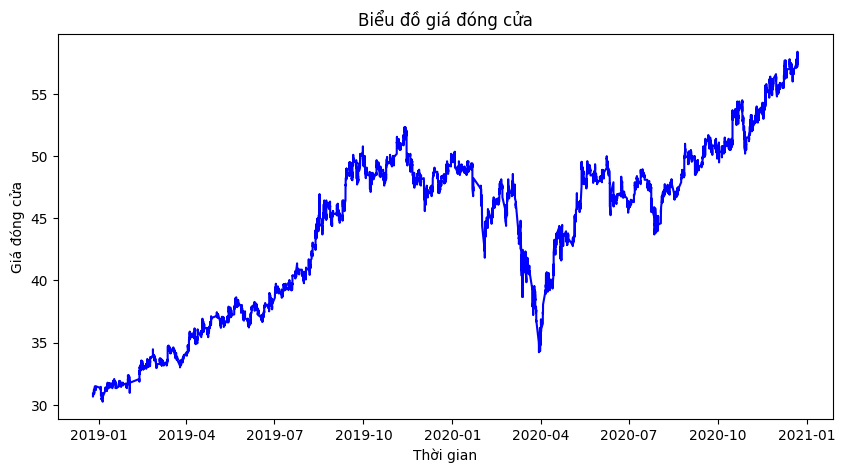

In [186]:
plot_df(fpt_df)

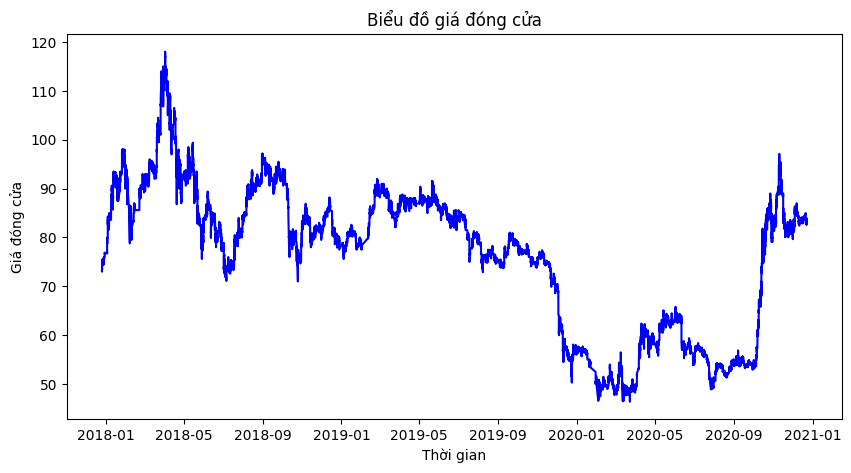

In [187]:
plot_df(msn_df)

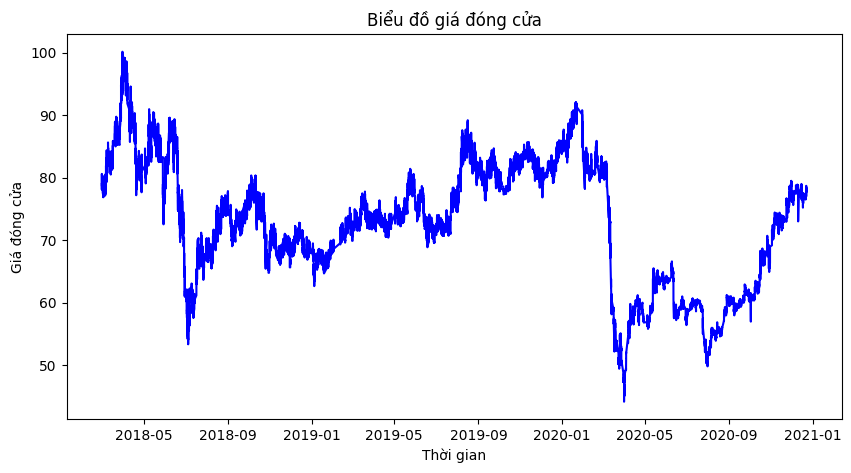

In [188]:
plot_df(pnj_df)

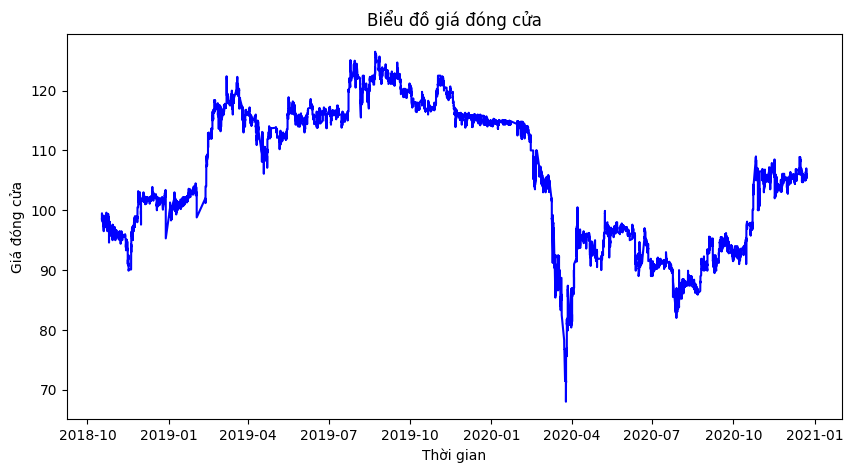

In [189]:
plot_df(vic_df)

- Có 2 mô hình phù hợp là **LSTM** và **Random forest**

#Build model Random Forest

In [190]:
#Tính giá trung bình của các ngày khác nhau
def avg_priceAndVolume_per_day(df):
  unique_dates = df['Date/Time'].dt.date.unique()
  average_close_prices = {}
  avg_prices = []
  avg_volume = []
  for date in unique_dates:
    daily_data = df[df['Date/Time'].dt.date == date] #lấy ra dữ liệu trong 1 ngày
    average_close = daily_data['Close'].mean()
    avg_volume.append(daily_data['Volume'].mean())
    avg_prices.append(daily_data['Close'].mean())
    average_close_prices[date] = average_close
  last_price = df['Close'].iloc[-1]
  last_volume = df['Volume'].iloc[-1]
  return avg_prices, avg_volume, last_price, last_volume, average_close_prices
def absolute_change(lst):
  return [lst[i] - lst[i-1] for i in range(1, len(lst))]

In [191]:
def model_randomForest(df):
  close_price_avg, volume_avg, last_price, last_volume, _ = avg_priceAndVolume_per_day(df)
  X = [[close, volume] for close, volume in zip(close_price_avg[:-1], volume_avg[:-1])]
  X = np.array(X).reshape(-1, 2)
  y=np.array(absolute_change(close_price_avg))
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  model = RandomForestRegressor(n_estimators=100, random_state=42)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  return model, mse, r2, last_price, last_volume
def predict_randomForest(df):
  model, mse_score, r2, last_price, last_volume = model_randomForest(df)
  next_day_change_prediction = model.predict(np.array([[last_price, last_volume]]))
  print(f'MSE score: {mse_score}')
  print(f'R-squared score: {r2}')
  print(f'Dự đoán giá biến động ngày tiếp theo: {next_day_change_prediction}')
  print(f"Dự đoán giá đóng cửa ngày tiếp theo: {last_price + next_day_change_prediction}")

#Build model LSTM (Long Short Term Memory)

In [192]:
def model_LSTM(df):
    # Tính toán các giá trị trung bình
    close_price_avg, volume_avg, last_price, last_volume, _ = avg_priceAndVolume_per_day(df)

    # Chuẩn bị dữ liệu: Tạo cặp (X, y)
    X = [[close, volume] for close, volume in zip(close_price_avg[:-1], volume_avg[:-1])]
    X = np.array(X)
    y = np.array(absolute_change(close_price_avg))

    # Chuẩn hóa dữ liệu
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

    # Chuyển đổi dữ liệu thành chuỗi cho LSTM
    # LSTM yêu cầu dữ liệu dạng [samples, time_steps, features]
    X_seq = []
    y_seq = []
    time_steps = 5  # Số bước thời gian (có thể điều chỉnh)

    for i in range(time_steps, len(X_scaled)):
        X_seq.append(X_scaled[i-time_steps:i])  # Tạo chuỗi đầu vào
        y_seq.append(y_scaled[i])  # Giá trị mục tiêu

    X_seq = np.array(X_seq)
    y_seq = np.array(y_seq)

    # Chia dữ liệu thành tập huấn luyện và kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

    # Xây dựng mô hình LSTM
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, X_seq.shape[2])))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mse')

    # Huấn luyện mô hình
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    # Dự đoán và đánh giá mô hình
    y_pred_scaled = model.predict(X_test)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_test_rescaled = scaler_y.inverse_transform(y_test)
    last_price = df['Close'].iloc[-1]
    last_volume = df['Volume'].iloc[-1]
    mse = mean_squared_error(y_test_rescaled, y_pred)
    r2 = r2_score(y_test_rescaled, y_pred)

    return model, mse, r2, last_price, last_volume

def predict_LSTM(df):
  lstm_fpt_model, mse_score, r2, last_price, last_volume = model_LSTM(df)

  time_steps = 5 #sử dụng dữ liệu trong 5 ngày
  last_data_points = np.array(df[['Close', 'Volume']][-time_steps:]).reshape(1, time_steps, 2) #lấy ra 5 ngày cuối để dự đoán

  scaler_X = MinMaxScaler()
  scaler_y = MinMaxScaler()

  scaler_X.fit(np.array(df[['Close', 'Volume']]))
  scaler_y.fit(np.array(df['Close'].diff().dropna().values.reshape(-1,1)))

  scaled_last_data = scaler_X.transform(last_data_points.reshape(-1,2))
  scaled_last_data = scaled_last_data.reshape(1,time_steps,2)

  next_day_change_scaled = lstm_fpt_model.predict(scaled_last_data)
  next_day_change_prediction = scaler_y.inverse_transform(next_day_change_scaled)

  print(f'MSE score: {mse_score}')
  print(f'R-squared score: {r2}')
  print(f'Dự đoán biến động giá cổ phiếu ngày tiếp theo: {next_day_change_prediction[0][0]}')
  print(f'Giá đóng ngày cuối: {last_price}')

  predicted_next_day_price = last_price + next_day_change_prediction[0][0]

  print(f"Dự đoán giá đóng cửa ngày tiếp theo: {predicted_next_day_price}")

In [193]:
predict_randomForest(fpt_df)

MSE score: 0.33938880945720074
R-squared score: -0.328970453400951
Dự đoán giá biến động ngày tiếp theo: [-0.18590429]
Dự đoán giá đóng cửa ngày tiếp theo: [57.91409571]


In [194]:
predict_LSTM(fpt_df)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
MSE score: 0.3179358525595873
R-squared score: -0.011708965992430098
Dự đoán biến động giá cổ phiếu ngày tiếp theo: -0.4922015964984894
Giá đóng ngày cuối: 58.1
Dự đoán giá đóng cửa ngày tiếp theo: 57.60779840350151


 Mô hình **Random Forest** có điểm $R^2$ nhỏ hơn mô hình **LSTM**, đồng nghĩa với việc mô hình **LSTM** giải thích sự biến thiên của dữ liệu tốt hơn mô hình **Random Forest** $=>$ Nên dùng mô hình **LSTM**

Vì biến động giá cổ phiếu của mỗi mã là khác nhau rất lớn nên sẽ cần cho train lại mô hình với mỗi tập dữ liệu mã cổ phiếu khác nhau

#FPT

In [195]:
predict_LSTM(fpt_df)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
MSE score: 0.3622761305296623
R-squared score: -0.1528049022191067
Dự đoán biến động giá cổ phiếu ngày tiếp theo: -0.3543519675731659
Giá đóng ngày cuối: 58.1
Dự đoán giá đóng cửa ngày tiếp theo: 57.745648032426836


#MSN

In [196]:
predict_LSTM(msn_df)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
MSE score: 3.0360827330565487
R-squared score: -0.010470709924801369
Dự đoán biến động giá cổ phiếu ngày tiếp theo: 0.550972044467926
Giá đóng ngày cuối: 82.8
Dự đoán giá đóng cửa ngày tiếp theo: 83.35097204446792


#PNJ

In [197]:
predict_LSTM(pnj_df)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MSE score: 2.9394421985360384
R-squared score: -0.04378623151068495
Dự đoán biến động giá cổ phiếu ngày tiếp theo: -0.32429561018943787
Giá đóng ngày cuối: 78.3
Dự đoán giá đóng cửa ngày tiếp theo: 77.97570438981056


#VIC

In [198]:
predict_LSTM(vic_df)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
MSE score: 1.7711758496094308
R-squared score: 0.01570197502435633
Dự đoán biến động giá cổ phiếu ngày tiếp theo: -0.3925159275531769
Giá đóng ngày cuối: 105.7
Dự đoán giá đóng cửa ngày tiếp theo: 105.30748407244683
